In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from twinmnist import TwinMnist
from sklearn.manifold import TSNE
from conf import X_DIM, C_DIM, S_DIM, MODEL_FILE
from conf import e, ec, es, d, ec_tail
from conf import rs

C:\Users\tommy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, X_DIM], name='x')
c = tf.placeholder(tf.float32, [None, C_DIM], name='c')
s = tf.placeholder(tf.float32, [None, S_DIM], name='s')

x_z = e(x)
x_c, x_s = ec_tail(ec(x_z)), es(x_z)
x_r = d(tf.concat([x_c, x_s], axis=1))
x_g = d(tf.concat([c, s], axis=1))

In [4]:
tm = TwinMnist(train_dir='MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


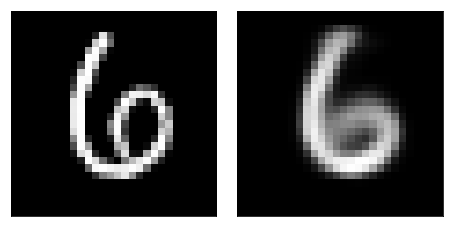

In [6]:
def ae_example(d):
    d1 = tm.sample(d, 1)
    d1_r = sess.run(x_r, {x: d1})
    
    gs = gridspec.GridSpec(1, 2, top=1., bottom=0., right=1., left=0., hspace=0.1, wspace=0.1)

    g = gs[0]
    ax = plt.subplot(g)
    ax.imshow(d1[0].reshape((28, 28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    g = gs[1]
    ax = plt.subplot(g)
    ax.imshow(d1_r[0].reshape((28, 28)), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()
    plt.clf()

ae_example(6)

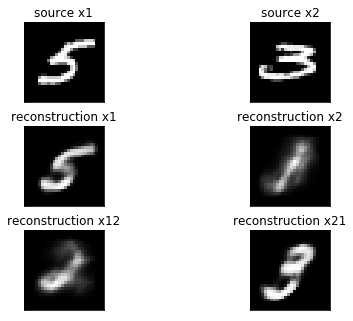

In [7]:
def style_transfer(n1, n2):
    d1 = tm.sample(n1, 1)
    d2 = tm.sample(n2, 1)
    
    d1_c, d1_s = sess.run([x_c, x_s], {x: d1})
    d2_c, d2_s = sess.run([x_c, x_s], {x: d2})
    #print(d1_c.shape, d1_s.shape)
    #return None
    
    d1_r = sess.run(x_g, {c: d1_c, s: d1_s})
    d2_r = sess.run(x_g, {c: d2_c, s: d2_s})
    
    d12_r = sess.run(x_g, {c: d1_c, s: d2_s})
    d21_r = sess.run(x_g, {c: d2_c, s: d1_s})
    
    gs = gridspec.GridSpec(3, 2, top=1., bottom=0., right=1., left=0., hspace=0.3, wspace=0.1)

    g = gs[0, 0]
    ax = plt.subplot(g)
    ax.imshow(d1[0].reshape((28, 28)), cmap='gray')
    ax.set_title('source x1')
    ax.set_xticks([])
    ax.set_yticks([])
    
    g = gs[0, 1]
    ax = plt.subplot(g)
    ax.imshow(d2[0].reshape((28, 28)), cmap='gray')
    ax.set_title('source x2')
    ax.set_xticks([])
    ax.set_yticks([])
    
    g = gs[1, 0]
    ax = plt.subplot(g)
    ax.imshow(d1_r[0].reshape((28, 28)), cmap='gray')
    ax.set_title('reconstruction x1')
    ax.set_xticks([])
    ax.set_yticks([])
    
    g = gs[1, 1]
    ax = plt.subplot(g)
    ax.imshow(d2_r[0].reshape((28, 28)), cmap='gray')
    ax.set_title('reconstruction x2')
    ax.set_xticks([])
    ax.set_yticks([])
    
    g = gs[2, 0]
    ax = plt.subplot(g)
    ax.imshow(d12_r[0].reshape((28, 28)), cmap='gray')
    ax.set_title('reconstruction x12')
    ax.set_xticks([])
    ax.set_yticks([])
    
    g = gs[2, 1]
    ax = plt.subplot(g)
    ax.imshow(d21_r[0].reshape((28, 28)), cmap='gray')
    ax.set_title('reconstruction x21')
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()
    plt.clf()

style_transfer(5, 3)

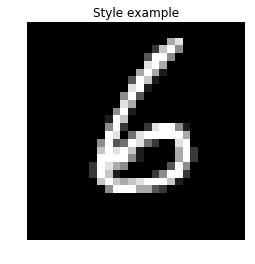

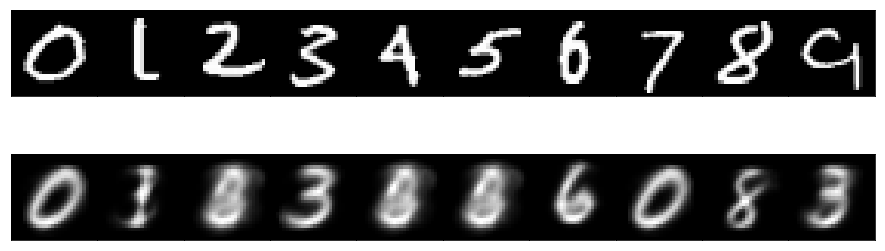

In [8]:
def style_transfer_mnist(n1):
    d1 = tm.sample(n1, 1)
    dn = np.concatenate([tm.sample(i, 1) for i in range(10)], 0)
    
    d1_c, d1_s = sess.run([x_c, x_s], {x: d1})
    dn_c, dn_s = sess.run([x_c, x_s], {x: dn})
    
    dn1_g = sess.run(x_g, {c: dn_c, s: np.repeat(d1_s, 10, 0)})
    
    plt.imshow(d1[0].reshape((28, 28)), cmap='gray')
    plt.title('Style example')
    plt.axis('off')
    plt.show()
    plt.clf()
    
    gs = gridspec.GridSpec(2, 10, top=1., bottom=0., right=2., left=0., hspace=.0, wspace=.0)
    
    for i in range(10):
        g = gs[0, i]
        ax = plt.subplot(g)
        ax.imshow(dn[i].reshape((28, 28)), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
    for i in range(10):
        g = gs[1, i]
        ax = plt.subplot(g)
        ax.imshow(dn1_g[i].reshape((28, 28)), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    plt.clf()
    
style_transfer_mnist(6)

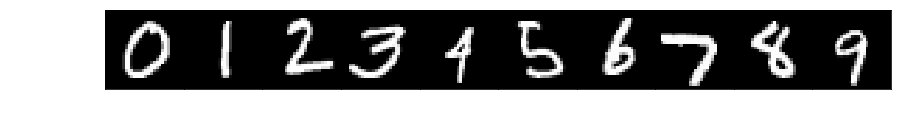

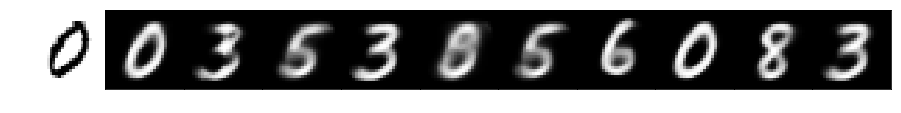

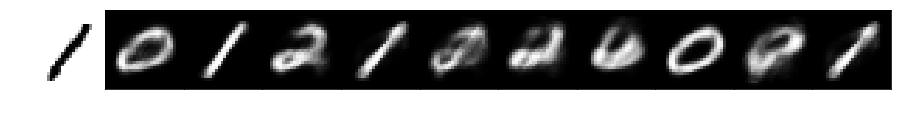

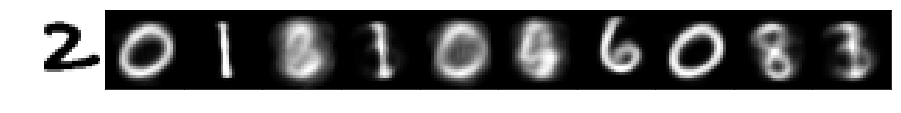

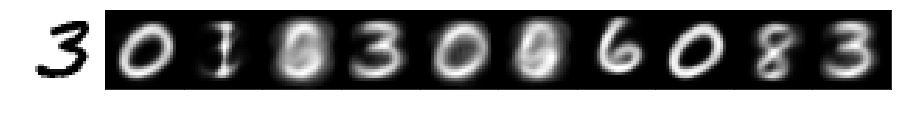

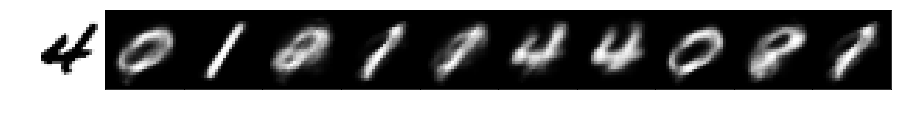

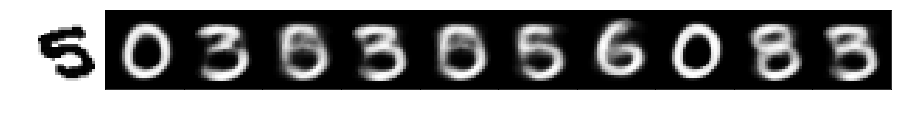

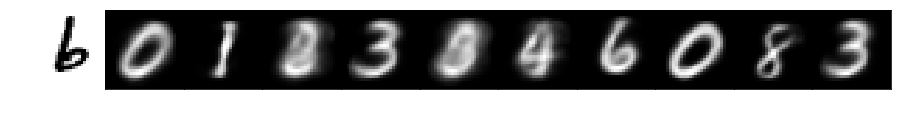

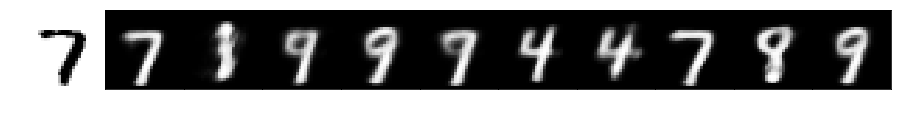

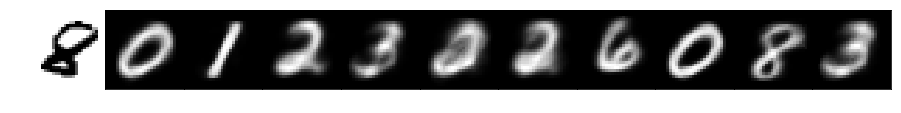

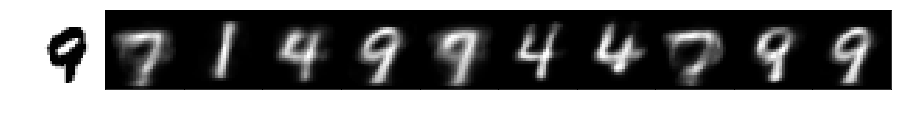

In [9]:
def plot_digits(d, n):
    gs = gridspec.GridSpec(1, 11, top=1., bottom=0., right=2., left=0., hspace=.0, wspace=.0)
    
    g = gs[0, 0]
    ax = plt.subplot(g)
    fig = ax.imshow(d[0].reshape((28, 28)), cmap='binary')
    plt.axis('off')
    #ax.set_xticks([])
    #ax.set_yticks([])
     
    for i in range(1, 11):
        g = gs[0, i]
        ax = plt.subplot(g)
        ax.imshow(n[i-1].reshape((28, 28)), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    plt.clf()

def style_transfer_mnist_2():
    dn = np.concatenate([tm.sample(i, 1) for i in range(10)], 0)
    dn_c = sess.run(x_c, {x: dn})
    
    plot_digits(np.zeros((1, 28*28)), dn)
    for i in range(10):
        dc = tm.sample(i, 1)
        dc_s = np.repeat(sess.run(x_s, {x: dc}), 10, 0)
        
        dnc_r = sess.run(x_g, {c: dn_c, s: dc_s})
        plot_digits(dc, dnc_r)

style_transfer_mnist_2()

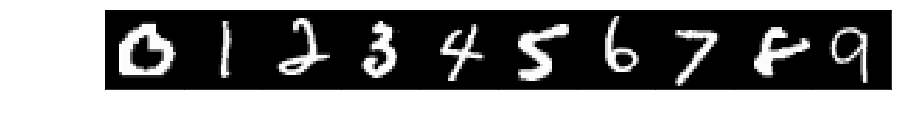

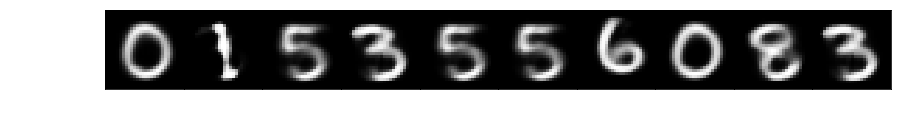

In [10]:
def random_style():
    dn = np.concatenate([tm.sample(i, 1) for i in range(10)], 0)
    dn_c = sess.run(x_c, {x: dn})
    r_style = np.repeat(rs(1), 10, 0)
    dn_crs = sess.run(x_g, {c: dn_c, s: r_style})
    plot_digits(np.zeros((1, 28*28)), dn)
    plot_digits(np.zeros((1, 28*28)), dn_crs)

random_style()

# plot latent space

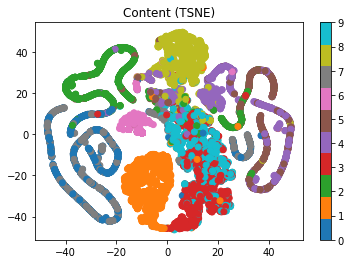

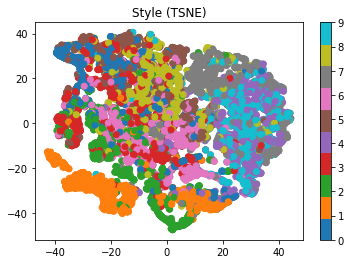

In [11]:
def z_plot(z, labels, title, n_iter=500):
    if z.shape[1] == 2:
        plt.scatter(z[:, 0], z[:, 1], c=labels, cmap='tab10')
        plt.title(title)
        plt.colorbar()
        plt.show()
        plt.clf()
    else:
        z_2d = TSNE(n_components=2, n_iter=n_iter).fit_transform(z)
        z_plot(z_2d, labels, title + ' (TSNE)', n_iter)
    
    
def plot_latent_space(n):
    test_batch_x, test_batch_y = tm.mnist.test.next_batch(n)
    test_batch_c, test_batch_s = sess.run([x_c, x_s], {x: test_batch_x})
    
    z_plot(test_batch_c, test_batch_y, 'Content')
    z_plot(test_batch_s, test_batch_y, 'Style')
    
plot_latent_space(10000)